### Pandas (Python Data Analysis)

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1280px-Pandas_logo.svg.png' width=600>

## План занятия:
- Что такое pandas и как его установить?
- Введение в pandas
- Базовые методы и атрибуты DataFrame
- Взятие объекта по индексу
- Создание новых признаков
- Фильтрации через условия
- Изменение сущеуствующих признаков
- Сортировки
- Итоги

## Что такое pandas и как его установить?

Pandas - это библиотека Python, помогающая делать быструю, удобную и гибкую аналитику и обработку данных.

Библиотека имеет тот же функционал (а местами даже больше), что и инструменты Microsoft Excel и Google Sheets. В двух представленных инструментах есть ограничения на количество строк/столбцов/ячеек, что очень сильно ограничивает аналитику. А вот в библитике pandas таких ограничений нет, можно анализировать, сколько угодно строк данных, здесь вы ограничиваетесь только оперативной памятью своей машины.


Для data scientist'ов pandas поможет тем, что возьмет на себя задачи по
- подготовке сырых данных
- по чистке данных
- по аналитике данных
- по огранизации результатов анализа в подходящую форму



Чтобы установить себе pandas нужно выполнить команду в консоли


```
!pip install pandas
```

Но в google colab пакет pandas и так уже есть, так что следующую ячейку можно было бы и не запускать.

In [ ]:
!pip install pandas

Чтобы получить доступ ко всем волшебным методам в pandas, для начала нужно его импортировать себе в ноутбук.

Импортируем pandas и даем ему псевдоним `pd`, чтобы при обращении не писать всё название пакета.

## Введение в pandas

Есть две основные структуры в данных в pandas:
1. Series - имеет одну размерность (контейнер для скаляров)
2. DataFrame - имеет две размерности (контейнер для Series)


### Series

Начнем своё знакомство с pandas Series (серия).

Эта структура данных может хранить любой тип данных, главное, чтобы один за раз. Хранятся данные с индексом.


Чтобы создать серию нужно вызвать:
```
s = pd.Series(data, index=index)
```

`data` может быть тремя вещами:
1. Python dict
2. np.array
3. скаляр

`index` - это список индексов, если его не передавать, то индексы будут созданы автоматически с 0 до `len(data)-1`.

Посмотрим на пару способов создания этого объекта

- **Создание через np.array или python list**

Давайте создадим первую pandas серию через numpy массив.


In [ ]:
import numpy as np

pd.Series(np.random.randint(5, size=(3)), index=['a', 'b', 'c'])

NameError: ignored

In [ ]:
pd.Series([0, 3, 7], index=['a', 'b', 'c'])

a    0
b    3
c    7
dtype: int64

In [ ]:
pd.Series(np.random.randint(5, size=(3)))

0    4
1    0
2    1
dtype: int64

- **Создание через dict**

Если не будем передавать индексы, то pandas посчитает, что ключи - это индексы, а значение - это значения серии.

In [ ]:
d = {'c': 1, 'b': 2, 'a': 3}

pd.Series(d)

c    1
b    2
a    3
dtype: int64

А если индексы передавать, то по этим индексам будут искаться значения в словаре.

А если такого ключа в словаре не найдется, то поставится NaN - это маркер для обозначения пропущенного объекта.

In [ ]:
d = {'c': 1, 'b': 2, 'a': 3}

pd.Series(d, index=['a', 'c', 'd'])

a    3.0
c    1.0
d    NaN
dtype: float64

- **Создание через скаляр**

Если передан скаляр, а индексы - нет, то будет одно значение в серии

In [ ]:
pd.Series(1)

0    1
dtype: int64

А если индексы передаются, то скаляр повторится столько раз, сколько есть индексов.

In [ ]:
pd.Series(8, index=['a', 'b'])

a    8
b    8
dtype: int64

**Разные типы данных в серии**

In [ ]:
pd.Series(['a', 1, 0.4], index=['a', 'b', 'c'])

a      a
b      1
c    0.4
dtype: object

### DataFrame

DataFrame - это двумерная структура данных, где могут содержаться колонки с разными типами данных. Это очень похоже на таблицу.

Так же как и серии, DataFrame принимает много различных типов данных для создания:
1. Dict 1D np.arrays, lists, dicts или Series
2. 2-D np.array
3. Структурированный массив
4. Список dict
4. Series
5. Другой DataFrame


Можно создать таким образом:
```
pd.DataFrame(data, index=index, columns=columns)
```

Вместе с данными `data`, можно опционально передавать индексы и колонки.


Посмотрим на некоторые виды создания DataFrame.


- **Создание через dict серий**

Индексы в результате - объединение индексов серий.

А название колонок - ключи словаря.


In [ ]:
d = {
    'feature_1': pd.Series([1, 2, 3], index=['a', 'b', 'c']),
    'feature_2': pd.Series([1, 2, 3, 4, 5], index=['e', 'd', 'c', 'b', 'a']),
}

pd.DataFrame(d)

,feature_1,feature_2
a,1.0,5
b,2.0,4
c,3.0,3
d,NaN,2
e,NaN,1


Так же можем индексы передавать.

In [ ]:
pd.DataFrame(d, index=['a', 'c', 'e'])

,feature_1,feature_2
a,1.0,5
c,3.0,3
e,NaN,1


И можем передавать названия колонок.

Если таких колонок не было в ключах словаря, то появится колонка с пропусками.

In [ ]:
pd.DataFrame(d, index=['a', 'c', 'e'], columns=['feature_2', 'feature_3'])

,feature_2,feature_3
a,5,NaN
c,3,NaN
e,1,NaN


- **Создание через dict np.arrays/lists**

array/list должны быть все одного размера.

In [ ]:
d = {
    'feature_1': [1, 2, 3],
    'feature_2': np.array([5, 4, 3, 2, 1])
}

pd.DataFrame(d)

ValueError: ignored

Если передается индексы, то они должны быть такого же размера.

In [ ]:
d = {
    'feature_1': [1, 2, 3],
    'feature_2': np.array([5, 4, 3])
}

pd.DataFrame(d, index=['a', 'b', 'c'])

,feature_1,feature_2
a,1,5
b,2,4
c,3,3


А если индексы не передаются, то финальные индексы начинаются с 0 и заканчиваются в len(data)-1.

In [ ]:
pd.DataFrame(d)

,feature_1,feature_2
0,1,5
1,2,4
2,3,3


- **Создание через список dicts**


In [ ]:
data = [
    {'feature_1': 1, 'feature_2': 2},
    {'feature_1': 5, 'feature_2': 10, 'feature_3': 20}
]

pd.DataFrame(data)

,feature_1,feature_2,feature_3
0,1,2,NaN
1,5,10,20.0


И естественно можно передавать индексы и колонки.

In [ ]:
pd.DataFrame(data, index=['index_1', 'index_2'], columns=['feature_1', 'feature_3'])

,feature_1,feature_3
index_1,1,NaN
index_2,5,20.0


## Задача на сегодня

Давайте возьмем данные с google drive про покупателей: https://drive.google.com/file/d/17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45ddc2c450>,
      dtype=object)

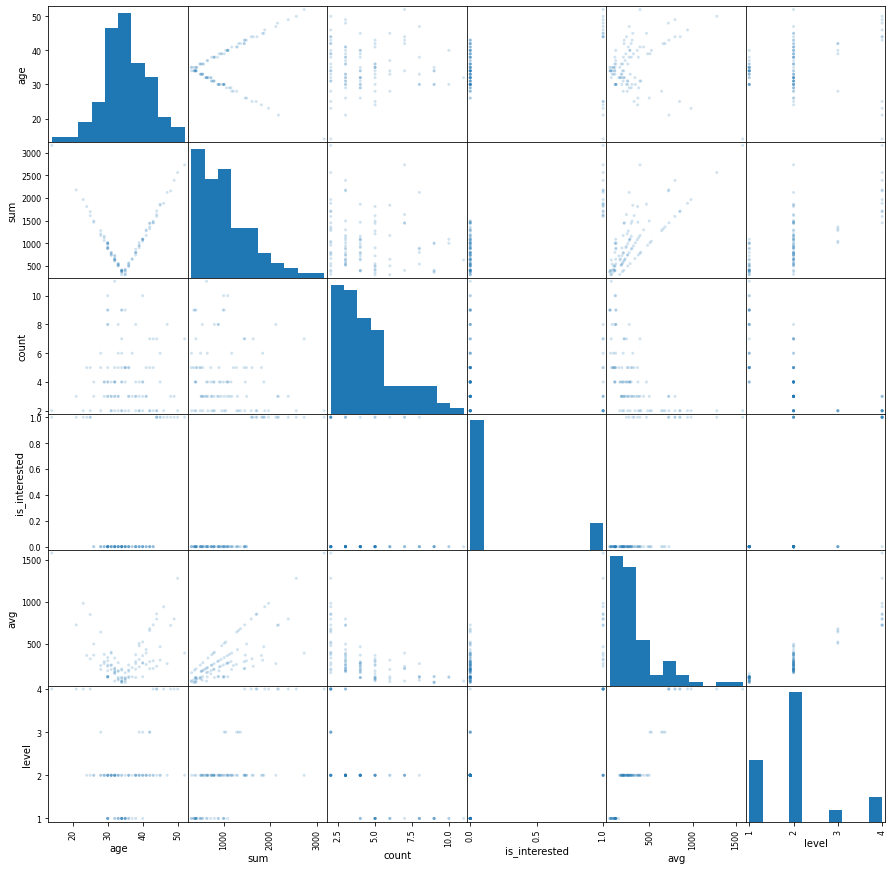

In [ ]:
# import pandas as pd
# import numpy as np

# назвать колонки age, sum, count, is_interested
# проверить на отсутствие значений
# добавить расчетный средн чек avg
# добавить расчетный левел - 4 категории по ср чеку
# гистограммы
# визуализировтаь матрица рассеяний

#df = pd.DataFrame(data)
#df.columns = ['age', 'sum', 'count', 'is_interested']
#avg = df['sum'] / df['count']

# df['avg'] = df.avg.round(2)
#df['level'] = 0
# df

# cond1 = df['avg'] <150
# cond2 = (df['avg'] >=150) & (df['avg'] <= 500)
# cond3 = (df['avg'] >=500) & (df['avg'] <= 700)
# cond4 = (df['avg'] >=700) 

# df.loc[cond1, 'level'] = 1
# df.loc[cond2, 'level'] = 2
# df.loc[cond3, 'level'] = 3
# df.loc[cond4, 'level'] = 4


#df.groupby('level')['age'].count()

# df['age'].hist()
# df['age'].plot(kind = 'hist')

# df.plot.scatter(x = 'age', y = 'sum', alpha = 0.2)


# df.describe()
# avg.describe()


from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = 0.2, figsize = (15, 15))




In [1]:
import pandas as pd
import numpy as np

!wget 'https://drive.google.com/uc?id=17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6' -O data.txt
data = np.loadtxt('data.txt')
df = pd.DataFrame(data)
df





--2022-11-16 17:47:56--  https://drive.google.com/uc?id=17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6
Resolving drive.google.com (drive.google.com)... 74.125.195.102, 74.125.195.113, 74.125.195.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hpd5hr8ghgirh23v7efsl7dupf58fabm/1668620850000/14904333240138417226/*/17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6?uuid=68aa2525-548c-4c2d-add4-7ee1cfc5937e [following]
--2022-11-16 17:47:56--  https://doc-10-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hpd5hr8ghgirh23v7efsl7dupf58fabm/1668620850000/14904333240138417226/*/17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6?uuid=68aa2525-548c-4c2d-add4-7ee1cfc5937e
Resolving doc-10-c0-docs.googleusercontent.com (doc-10-c0-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-10

In [2]:
df

,0,1,2,3
0,38.0,741.0,2.0,0.0
1,32.0,630.0,11.0,0.0
2,52.0,2730.0,7.0,1.0
3,33.0,552.0,2.0,0.0
4,35.0,409.0,5.0,0.0
...,...,...,...,...
95,40.0,1088.0,10.0,0.0
96,31.0,745.0,3.0,0.0
97,31.0,782.0,4.0,0.0
98,38.0,793.0,4.0,0.0


In [ ]:
data = np.loadtxt('data.txt')
df = pd.DataFrame(data)




In [ ]:
from pandas.core.groupby import groupby


#	Загрузить csv файл. Учитывать разделитель, заголовки, разделитель разрядов
# назвать колонки: age, sum, count, indicator

#•	Добавить колонки level=0, avg =0
#•	посчитать среднее в avg, округлив его, в серию
#•	# добавить колонки avg , level
#•	Прописать 4 условия для avg
#•	Присвоить Колонке level



#df.columns = ["age", "sum", 'count', 'indicator']
#df.head()

# df['avg'] = 0
# #df['level'] = 0

# avg = df['sum']/df['count']

# df['avg'] = round(avg)
# df.head()


# cond1 = df['avg'] <150
# cond2 = (df['avg'] >=150) & (df['avg'] <250)
# cond3 = (df['avg'] >=250) & (df['avg'] <450)
# cond4 = (df['avg'] >=450) 

# df.loc[cond1, 'level'] = 1
# df.loc[cond2, 'level'] = 2
# df.loc[cond3, 'level'] = 3
# df.loc[cond4, 'level'] = 4


# df.head(6)

#df.groupby('level')['avg'].mean().round()
# df.groupby('level')['age'].count().round()

#s=df['age'].unique()
#s.sort_values()
df.sort_values(['avg'])



,age,sum,count,indicator,level,avg
26,35.0,359.0,9.0,0.0,1,40.0
92,34.0,379.0,9.0,0.0,1,42.0
56,34.0,407.0,9.0,0.0,1,45.0
32,34.0,306.0,6.0,0.0,1,51.0
1,32.0,630.0,11.0,0.0,1,57.0
...,...,...,...,...,...,...
50,44.0,1713.0,2.0,1.0,4,856.0
5,46.0,1882.0,2.0,1.0,4,941.0
14,23.0,1964.0,2.0,1.0,4,982.0
57,50.0,2560.0,2.0,1.0,4,1280.0


In [ ]:
!wget 'https://drive.google.com/uc?id=17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6' -O data.txt
import pandas as pd
import numpy as np

# data = np.loadtxt('data.txt')
# df = pd.DataFrame(data)


# age, sum, count, is_interested
# isnull проверка

# +колонка level. = 0
#средний чек туда
# левел 4 уровня
# группировки


# df.columns = ['age', 'sum', 'count', 'is_interested']
# avg = df['sum']/df['count']

# df['avg'] = avg.round(1)
# df


# df['level'] = 0


# cond1 = df['avg'] <100
# cond2 = (df['avg'] >= 100) & (df['avg'] <200) 
# cond3 = (df['avg'] >= 200) & (df['avg'] <400) 
# cond4 = (df['avg'] > 400) 


# df[(df['avg'] >= 200) & (df['avg'] <400)]

# df.loc[cond1, 'level']  = 1
# df.loc[cond2, 'level']  = 2
# df.loc[cond3, 'level']  = 3
# df.loc[cond4, 'level']  = 4
# df

# df[df['avg'] <200].count()


# df.groupby('level').mean().round(1)
# df.groupby('level').count().round(1)
# df.groupby('level')['sum'].mean()

# df.isnull().value_counts()

# df.plot('age', 'sum', kind = 'scatter')






--2022-05-30 17:08:13--  https://drive.google.com/uc?id=17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6
Resolving drive.google.com (drive.google.com)... 142.250.141.101, 142.250.141.113, 142.250.141.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e4pha9a0nkus6m87ccmtuetthtpvr8re/1653930450000/14904333240138417226/*/17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6 [following]
--2022-05-30 17:08:14--  https://doc-10-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e4pha9a0nkus6m87ccmtuetthtpvr8re/1653930450000/14904333240138417226/*/17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6
Resolving doc-10-c0-docs.googleusercontent.com (doc-10-c0-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-10-c0-docs.googleusercontent.com (doc-10-c0-docs.googleusercontent.com)|142.250.1

In [ ]:
data = np.loadtxt('data.txt')

In [ ]:
# df = pd.DataFrame(data)
# df.columns = ['age', 'sum', 'count', 'ind']
# df['avg'] = 0

# df['level'] = 0
# df.head(5)

# avg = df['sum'] / df['count']
# avg
# df['avg'] = round(avg,1)



# cond1 = df['avg'] <150
# cond2 = (df['avg'] >=150) & (df['avg'] <250)
# cond3 =  (df['avg'] >=250) & (df['avg'] <450)
# cond4 =  (df['avg'] >=450)

# df.loc[cond1, 'level']   =1
# df.loc[cond2, 'level']   =2
# df.loc[cond3, 'level']   =3
# df.loc[cond4, 'level']   =4

# df.value_counts('level')

#df.groupby('level')['age', 'avg'].sum()
# df.groupby('level')['age', 'avg'].min()


# df

#sort_values(df.level.unique())
# df['level'].unique()
# df.sort_values(['sum'])







,age,sum,count,ind,avg,level
28,35.0,303.0,5.0,0.0,60.6,1
32,34.0,306.0,6.0,0.0,51.0,1
65,35.0,312.0,2.0,0.0,156.0,2
34,34.0,352.0,5.0,0.0,70.4,1
26,35.0,359.0,9.0,0.0,39.9,1
...,...,...,...,...,...,...
70,21.0,2177.0,3.0,1.0,725.7,4
80,49.0,2388.0,3.0,1.0,796.0,4
57,50.0,2560.0,2.0,1.0,1280.0,4
2,52.0,2730.0,7.0,1.0,390.0,3


--2022-05-22 12:07:25--  https://drive.google.com/uc?id=17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6
Resolving drive.google.com (drive.google.com)... 74.125.142.138, 74.125.142.139, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fl7k0nsuqtmtcnqlud7sv6usd41v4cfo/1653221175000/14904333240138417226/*/17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6 [following]
--2022-05-22 12:07:26--  https://doc-10-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fl7k0nsuqtmtcnqlud7sv6usd41v4cfo/1653221175000/14904333240138417226/*/17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6
Resolving doc-10-c0-docs.googleusercontent.com (doc-10-c0-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-10-c0-docs.googleusercontent.com (doc-10-c0-docs.googleusercontent.com)|74.125.142.132

In [ ]:
!wget 'https://drive.google.com/uc?id=17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6' -O data.txt

# import numpy as np
# data = np.loadtxt('data.txt')


# import pandas as pd
# df = pd.DataFrame(data)
# df.columns=['age', 'sum', 'count', 'indicator']




# avg = df['sum']/df['count']



# df['avg'] = 1
# df['avg'] = avg
# df['level'] = 0


# cond1 = df['avg'] < 100
# cond2 = (df['avg'] >= 100) & (df['avg'] < 200)
# cond3 = (df['avg'] >= 200) & (df['avg'] < 500)
# cond4 = (df['avg'] >= 500) 

# df.loc[cond1, 'level'] = 1
# df.loc[cond2, 'level'] = 2
# df.loc[cond3, 'level'] = 3
# df.loc[cond4, 'level'] = 4

# df.head(10)


# from pandas.plotting import scatter_matrix 
# scatter_matrix(df, alpha=0.5, figsize=(10, 10), diagonal="kde");

# df['avg'].describe().round(2)


#df.groupby('age')['age'].count().hist()
# df.groupby('age')['age'].count().plot(kind = 'hist')








--2022-05-30 17:05:32--  https://drive.google.com/uc?id=17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6
Resolving drive.google.com (drive.google.com)... 142.250.141.100, 142.250.141.139, 142.250.141.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j3tvt1jrd0j0ngaqs7igqr4fd3jb0r3u/1653930300000/14904333240138417226/*/17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6 [following]
--2022-05-30 17:05:33--  https://doc-10-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j3tvt1jrd0j0ngaqs7igqr4fd3jb0r3u/1653930300000/14904333240138417226/*/17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6
Resolving doc-10-c0-docs.googleusercontent.com (doc-10-c0-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-10-c0-docs.googleusercontent.com (doc-10-c0-docs.googleusercontent.com)|142.250.1

In [ ]:

type(data)

numpy.ndarray

In [ ]:
data.shape

(100, 4)

Вот и ещё один способ создания DataFrame - через 2D np.array.

In [ ]:
df = pd.DataFrame(data)
df

,0,1,2,3
0,38.0,741.0,2.0,0.0
1,32.0,630.0,11.0,0.0
2,52.0,2730.0,7.0,1.0
3,33.0,552.0,2.0,0.0
4,35.0,409.0,5.0,0.0
...,...,...,...,...
95,40.0,1088.0,10.0,0.0
96,31.0,745.0,3.0,0.0
97,31.0,782.0,4.0,0.0
98,38.0,793.0,4.0,0.0


Индексы оставим дефолтные, а вот признаки переименуем.


In [ ]:
pd.set_option('display.max_rows', 6)

In [ ]:
df.columns = ['age', 'sum', 'num_purchases', 'is_interested']
df

,age,sum,num_purchases,is_interested
0,38.0,741.0,2.0,0.0
1,32.0,630.0,11.0,0.0
2,52.0,2730.0,7.0,1.0
...,...,...,...,...
97,31.0,782.0,4.0,0.0
98,38.0,793.0,4.0,0.0
99,38.0,800.0,8.0,0.0


In [ ]:
df.columns

Index(['age', 'sum', 'num_purchases', 'is_interested'], dtype='object')

## Отображение датафрейма

**метод head()**

Возвращает первые n объектов, если n не указывать, то вернутся 5 объектов.

In [ ]:
df.head()

,age,sum,num_purchases,is_interested
0,38.0,741.0,2.0,0.0
1,32.0,630.0,11.0,0.0
2,52.0,2730.0,7.0,1.0
3,33.0,552.0,2.0,0.0
4,35.0,409.0,5.0,0.0


**метод tail()**

Возвращает последние n объектов, если n не указывать, то вернутся 5 объектов.

In [ ]:
df.tail(3)

,age,sum,num_purchases,is_interested
97,31.0,782.0,4.0,0.0
98,38.0,793.0,4.0,0.0
99,38.0,800.0,8.0,0.0


**метод sample()**

Возвращает случайный объект из датафрейма.

In [ ]:
df.sample()

,age,sum,num_purchases,is_interested
67,34.0,373.0,2.0,0.0


Если указать атрибут frac, то вернется доля объектов.

In [ ]:
df.sample(frac=0.5)

,age,sum,num_purchases,is_interested
96,31.0,745.0,3.0,0.0
18,24.0,1811.0,5.0,1.0
82,40.0,1045.0,2.0,0.0
...,...,...,...,...
40,32.0,605.0,3.0,0.0
36,36.0,497.0,2.0,0.0
45,44.0,1591.0,2.0,1.0


**метод describe()**

Выводит краткую статистическую сводку таблицу.

In [ ]:
pd.set_option('display.max_rows', 6)

In [ ]:
df.describe()

,age,sum,num_purchases,is_interested
count,100.000000,100.000000,100.000000,100.000000
mean,35.140000,1030.400000,4.360000,0.170000
std,6.576696,586.787729,2.263099,0.377525
...,...,...,...,...
50%,34.000000,900.500000,4.000000,0.000000
75%,40.000000,1328.750000,5.000000,0.000000
max,52.000000,3159.000000,11.000000,1.000000


**метод info()**

Вывод информацию про пропущенные объекты и типы данных.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            100 non-null    float64
 1   sum            100 non-null    float64
 2   num_purchases  100 non-null    float64
 3   is_interested  100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


### Атрибуты датафрейма 

Давайте поизучаем структуру данных, которые у нас есть с помощью атрибутов объекта датафреймю

**shape**

Можем узнать размерность нашей таблицы.

In [ ]:
df.shape

(100, 4)

**columns**

Можем узнать названия колонок

In [ ]:
df.columns

Index(['age', 'sum', 'num_purchases', 'is_interested'], dtype='object')

**index**

Можем узнать названия индексов

In [ ]:
df.index

RangeIndex(start=0, stop=100, step=1)

**empty**

Можем узнать, а не пустой ли наш датафрейм

In [ ]:
df.empty

False

**dtypes**

Посмотрим на типы данных

In [ ]:
df.dtypes

age              float64
sum              float64
num_purchases    float64
is_interested    float64
dtype: object

Давайте поменяем признак is_interested с float на int, т.к. он бинарный, имеет только значения 0 и 1 и представляет из себя метку, а интересен ли нам покупатель, сделал ли он покупок на сумму больше, чем 1500.

### Взятие колонки из датафрейма

Чтобы взять конкрентый признак из DataFrame можно к нему обратиться через квадратные скобки `[]`.

Возвращается знакомая структура данных - pd.Series.

In [ ]:
df['is_interested']

0     0.0
1     0.0
2     1.0
     ... 
97    0.0
98    0.0
99    0.0
Name: is_interested, Length: 100, dtype: float64

Или же через точку `.`, но этот способ не рекомендуется.

К примеру, если у нас будет признак с проблемами, то и обратиться к нему через точку не получится:

```
df.is interested
```

А вот через квадратные скобки без проблем
```
df['is interested']
```

In [ ]:
df.is_interested

0     0.0
1     0.0
2     1.0
     ... 
97    0.0
98    0.0
99    0.0
Name: is_interested, Length: 100, dtype: float64

А вот если хочется взять не одну колонку, а сразу несколько, то здесь поможет только синтаксис с квадратными скобочками, куда нужно передать список названий колонок.

In [ ]:
df[['num_purchases', 'age']]

,num_purchases,age
0,2.0,38.0
1,11.0,32.0
2,7.0,52.0
...,...,...
97,4.0,31.0
98,4.0,38.0
99,8.0,38.0


**метод astype**

Теперь наконец-то можем поменять тип данных на целочисленный у признака.

In [ ]:
df['is_interested'].astype('int')

0     0
1     0
2     1
     ..
97    0
98    0
99    0
Name: is_interested, Length: 100, dtype: int64

Теперь данный признак имеет тип int. Проверим через dtypes

In [ ]:
df.dtypes

age              float64
sum              float64
num_purchases    float64
is_interested    float64
dtype: object

Но здесь он до сих с типом данных float, а так вышло, потому что метод astype (как и многие другие методы) ничего не меняет в исходном датафрейме, а возвращает измененную копию.

Так что, чтобы изменения вступили в силу нужно явно переопределить признак.

In [ ]:
df['is_interested'] = df['is_interested'].astype('int')

df.dtypes

age              float64
sum              float64
num_purchases    float64
is_interested      int64
dtype: object

## Полезные методы датафрейма и серии

**метод unique()**

Можем узнать, а сколько есть уникальных значений в признаке количества покупок.

In [ ]:
df['num_purchases'].unique()

array([ 2., 11.,  7.,  5.,  8.,  4.,  3., 10.,  6.,  9.])

**метод nunique()**

А этот метод вернет количество, сколько таких объектов есть.

In [ ]:
df['num_purchases'].nunique()

10

**метод value_counts()**

Давайте посчитаем, а сколько обычно покупок делают наши клиенты.

Для этого нужно применить к датафрейму value_counts() и указать интересующий нас признак. 

In [ ]:
df.value_counts('num_purchases')

num_purchases
2.0     23
3.0     22
4.0     17
        ..
9.0      5
10.0     2
11.0     1
Length: 10, dtype: int64

Или же мы могли получить подобную статистику, если бы вначале выбрали признак num_purchases, а затем вызвали бы value_counts()

In [ ]:
df['num_purchases'].value_counts()

2.0     23
3.0     22
4.0     17
        ..
9.0      5
10.0     2
11.0     1
Name: num_purchases, Length: 10, dtype: int64

А еще можем нормализовать подсчитанные частоты через атрибут `normalize=True`

In [ ]:
df['num_purchases'].value_counts(normalize=True)

2.0     0.23
3.0     0.22
4.0     0.17
        ... 
9.0     0.05
10.0    0.02
11.0    0.01
Name: num_purchases, Length: 10, dtype: float64

### Методы агрегации

С помощью этих методов можно получить неплохой анализ данных

- **sum()**

Посчитаем, сколько денег суммарно нам принесли все пользователи.

In [ ]:
df['sum'].sum()

103040.0

- **mean()**

Посчитаем теперь, какой средний возраст у наших покупателей.

In [ ]:
df['age'].mean()

35.14

- **max()**

Узнаем, какое максимальное количество покупок совершалось.

In [ ]:
df['num_purchases'].max()

11.0

- **argmax()**

Давайте найдем индекс этого покупателя и посмотрим на остальные его признаки.

In [ ]:
idx = df['num_purchases'].argmax()
idx

1

### Взятие объекта по индексу


Теперь нужно взять строку по этому индексу, для этого есть метод loc

In [ ]:
df.loc[idx]

age               32.0
sum              630.0
num_purchases     11.0
is_interested      0.0
Name: 1, dtype: float64

При этом есть еще один подход, с помощью которого это можно сделать - это iloc.

В чем их отличие?

Для этого возьмем небольшой игрушечный пример и поймем разницу.

In [ ]:
toy_df = pd.DataFrame({
    'feature_1': [1, 2, 3],
    'feature_2': ['one', 'two', 'three']
}, index=[9, 5, 2])

toy_df

,feature_1,feature_2
9,1,one
5,2,two
2,3,three


#### loc

Данный метод берет объект по конкретному индексу.

In [ ]:
toy_df.loc[9]

feature_1      1
feature_2    one
Name: 9, dtype: object

Если такого индекса нет, то будет ошибка `KeyError`.

In [ ]:
toy_df.loc[8]

KeyError: ignored

При работе со срезами последний объект возвращается.

In [ ]:
toy_df.loc[:2]

,feature_1,feature_2
9,1,one
5,2,two
2,3,three


Так же можно брать объекты не только по индексу через loc, но и по колонке, если её название укажем через запятую.

In [ ]:
toy_df.loc[9, 'feature_2']

'one'

А можно и несколько индексов, и несколько признаков указывать. 

In [ ]:
toy_df.loc[[2, 9], ['feature_2', 'feature_1']]

,feature_2,feature_1
2,three,3
9,one,1


#### iloc

Данный метод берет объект по порядковому индексу.

In [ ]:
toy_df

,feature_1,feature_2
9,1,one
5,2,two
2,3,three


In [ ]:
toy_df.iloc[0]

feature_1      1
feature_2    one
Name: 9, dtype: object

Если такого порядкового индекса нет, то будет ошибка `IndexError`. Такая ошибка бывает, когда хотите взять элемент в списке, который выходит за рамки массива.

In [ ]:
toy_df.iloc[8]

IndexError: ignored

При работе со срезами последний объект НЕ возвращается.

In [ ]:
toy_df.iloc[:2]

,feature_1,feature_2
9,1,one
5,2,two


Так же можно брать объекты не только по порядковому индексу через iloc, но и по колонке, если её порядковый индекс указать через запятую.

In [ ]:
toy_df

,feature_1,feature_2
9,1,one
5,2,two
2,3,three


In [ ]:
toy_df.iloc[1, 0]

2

А можно и несколько порядковых индексов, и несколько порядковых индексов признаков указать.

In [ ]:
toy_df.iloc[[1, 0], [1, 0]]

,feature_2,feature_1
5,two,2
9,one,1


## Создание нового признака

Вернемся к нашим данным с покупателями и создадим новый признак - средний чек покупателя.

In [ ]:
df['sum'] / df['num_purchases']

0     370.500000
1      57.272727
2     390.000000
         ...    
97    195.500000
98    198.250000
99    100.000000
Length: 100, dtype: float64

И давайте округлим до двух знаков после запятой.

In [ ]:
df['avg_check'] = round(df['sum'] / df['num_purchases'], 2)
df.head()

,age,sum,num_purchases,is_interested,avg_check
0,38.0,741.0,2.0,0,370.50
1,32.0,630.0,11.0,0,57.27
2,52.0,2730.0,7.0,1,390.00
3,33.0,552.0,2.0,0,276.00
4,35.0,409.0,5.0,0,81.80


И еще давайте создадим новый признак, который показывает, к какой группе относится наш покупатель:
- small средний чек (< 150)
- medium средний чек (>= 150, < 600)
- large средний чек (>= 600)

Для начала создадим пустой новый признак, к примеру, заполним его нулями.

In [ ]:
df['check_category'] = 0

df.head()

,age,sum,num_purchases,is_interested,avg_check,check_category
0,38.0,741.0,2.0,0,370.50,0
1,32.0,630.0,11.0,0,57.27,0
2,52.0,2730.0,7.0,1,390.00,0
3,33.0,552.0,2.0,0,276.00,0
4,35.0,409.0,5.0,0,81.80,0


#### Удаление признака
Кстати, если вы создали что-то лишнее или не так назвали, то без проблем можете удалить признак из набора данных через метод drop.


In [ ]:
df['cccheck_category'] = 0
df.head()

,age,sum,num_purchases,is_interested,avg_check,check_category,cccheck_category
0,38.0,741.0,2.0,0,370.50,0,0
1,32.0,630.0,11.0,0,57.27,0,0
2,52.0,2730.0,7.0,1,390.00,0,0
3,33.0,552.0,2.0,0,276.00,0,0
4,35.0,409.0,5.0,0,81.80,0,0


Но один важный нюанс, если мы вызовем код с таким синтакисом, то ничего не поменяется в исходном наборе данных.

Признак всё еще на месте.

In [ ]:
df.drop(columns=['cccheck_category'])

df.head()

,age,sum,num_purchases,is_interested,avg_check,check_category,cccheck_category
0,38.0,741.0,2.0,0,370.50,0,0
1,32.0,630.0,11.0,0,57.27,0,0
2,52.0,2730.0,7.0,1,390.00,0,0
3,33.0,552.0,2.0,0,276.00,0,0
4,35.0,409.0,5.0,0,81.80,0,0


Чтобы признак удалился, нужно либо явно переопределить датафрейм

In [ ]:
df = df.drop(columns=['cccheck_category'])

Либо указать в методе `drop` атрибут `inplace=True`, тогда перезапись произойдет на месте.

In [ ]:
df.drop(columns=['cccheck_category'], inplace=True)
df.head()

,age,sum,num_purchases,is_interested,avg_check,check_category
0,38.0,741.0,2.0,0,370.50,0
1,32.0,630.0,11.0,0,57.27,0
2,52.0,2730.0,7.0,1,390.00,0
3,33.0,552.0,2.0,0,276.00,0
4,35.0,409.0,5.0,0,81.80,0


Но вот сейчас признак не удалился потому что такой колонки больше нет в нашем датафрейме.

С удалением разобрались, возвращаемся к группам покупателей и чтобы проставить метку, нам поможет фильтрация по данным.

### Фильтрация данных


Фильтрация в pandas возможна с помощью булевых масок.

К примеру, чтобы узнать, кто тратит в среднем меньше 150 можно воспользоваться таким синтакисом.

Возвращается булевая маска.

**small средний чек (< 150)**

In [ ]:
df['avg_check'] < 150

0     False
1      True
2     False
      ...  
97    False
98    False
99     True
Name: avg_check, Length: 100, dtype: bool

Теперь можем передать эту булевую маску в датафрейм для фильтрации.

In [ ]:
df[df['avg_check'] < 150]

,age,sum,num_purchases,is_interested,avg_check,check_category
1,32.0,630.0,11.0,0,57.27,0
4,35.0,409.0,5.0,0,81.80,0
7,30.0,891.0,8.0,0,111.38,0
...,...,...,...,...,...,...
92,34.0,379.0,9.0,0,42.11,0
95,40.0,1088.0,10.0,0,108.80,0
99,38.0,800.0,8.0,0,100.00,0


Давайте этим людям проставим метку в новом признаке "small avg check"

In [ ]:
df[df['avg_check'] < 150]['check_category'] = 'small avg check'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Вылезло какое-то предупреждение. Проверим на всякий случай наш датафрейм.

А у нас никак не изменился признак check_category. Всё потому, что если пользуемся синтакисом с квадратными скобками, то меняется копия нашего датафрейма, а не исходная версия.

In [ ]:
df.head()

,age,sum,num_purchases,is_interested,avg_check,check_category
0,38.0,741.0,2.0,0,370.50,0
1,32.0,630.0,11.0,0,57.27,0
2,52.0,2730.0,7.0,1,390.00,0
3,33.0,552.0,2.0,0,276.00,0
4,35.0,409.0,5.0,0,81.80,0


Чтобы поменялась исходная версия нужно передавать булевую маску в loc, это очень полезно, если эти данные затем хотим как-то видоизменить.

In [ ]:
df.loc[df['avg_check'] < 150]

,age,sum,num_purchases,is_interested,avg_check,check_category
1,32.0,630.0,11.0,0,57.27,0
4,35.0,409.0,5.0,0,81.80,0
7,30.0,891.0,8.0,0,111.38,0
...,...,...,...,...,...,...
92,34.0,379.0,9.0,0,42.11,0
95,40.0,1088.0,10.0,0,108.80,0
99,38.0,800.0,8.0,0,100.00,0


А вот теперь еще можем в loc добавить название признака, который хотим переопределить только для этих людей.

In [ ]:
df.loc[df['avg_check'] < 150, 'check_category']

1     0
4     0
7     0
     ..
92    0
95    0
99    0
Name: check_category, Length: 27, dtype: int64

И написать то значение, на которое хотим поменять старое.

Предупреждений нет и новая категория появилась в наших данных.

In [ ]:
df.loc[df['avg_check'] < 150, 'check_category'] = 'small avg check'

df.head()

,age,sum,num_purchases,is_interested,avg_check,check_category
0,38.0,741.0,2.0,0,370.50,0
1,32.0,630.0,11.0,0,57.27,small avg check
2,52.0,2730.0,7.0,1,390.00,0
3,33.0,552.0,2.0,0,276.00,0
4,35.0,409.0,5.0,0,81.80,small avg check


Остается провернуть всё тоже самое для двух других категорий.

**medium средний чек (>= 150, < 600)**


Здесь нас ждут два условия.

В pandas для операции логическое И нужно использовать не привычный `and`, а знак `&`.

In [ ]:
df.loc[(df['avg_check'] >= 150) & (df['avg_check'] < 600)]

,age,sum,num_purchases,is_interested,avg_check,check_category
0,38.0,741.0,2.0,0,370.50,0
2,52.0,2730.0,7.0,1,390.00,0
3,33.0,552.0,2.0,0,276.00,0
...,...,...,...,...,...,...
96,31.0,745.0,3.0,0,248.33,0
97,31.0,782.0,4.0,0,195.50,0
98,38.0,793.0,4.0,0,198.25,0


Так как условие уже довольно внушительное, то давайте его запишим в новую переменную.

In [ ]:
condition = (df['avg_check'] >= 150) & (df['avg_check'] < 600)
df.loc[condition]

,age,sum,num_purchases,is_interested,avg_check,check_category
0,38.0,741.0,2.0,0,370.50,0
2,52.0,2730.0,7.0,1,390.00,0
3,33.0,552.0,2.0,0,276.00,0
...,...,...,...,...,...,...
96,31.0,745.0,3.0,0,248.33,0
97,31.0,782.0,4.0,0,195.50,0
98,38.0,793.0,4.0,0,198.25,0


Теперь здесь остается взять новый признак и переписать его значение для этих людей на medium avg check.

In [ ]:
df.loc[condition, 'check_category'] = 'medium avg check'
df.head()

,age,sum,num_purchases,is_interested,avg_check,check_category
0,38.0,741.0,2.0,0,370.50,medium avg check
1,32.0,630.0,11.0,0,57.27,small avg check
2,52.0,2730.0,7.0,1,390.00,medium avg check
3,33.0,552.0,2.0,0,276.00,medium avg check
4,35.0,409.0,5.0,0,81.80,small avg check


**large средний чек (>= 600)**

И еще одна категория


Работаем по старой схеме.

In [ ]:
condition = (df['avg_check'] >= 600)
df.loc[condition, 'check_category'] = 'large avg check'

Проверим, что мы всё сделали правильно, и у нас теперь есть три категории.

In [ ]:
df['check_category'].value_counts()

medium avg check    59
small avg check     27
large avg check     14
Name: check_category, dtype: int64

#### Комбинация условий

Выше посмотрели на булевую маску с несколькими условиями, давайте остановимся здесь еще раз.

Есть две логические операции: И, ИЛИ.


**Логическое И**

Требует, чтобы два условия выполнялось, как было в примере выше.

In [ ]:
df.loc[(df['avg_check'] >= 150) & (df['avg_check'] < 600)]

,age,sum,num_purchases,is_interested,avg_check,check_category
0,38.0,741.0,2.0,0,370.50,medium avg check
2,52.0,2730.0,7.0,1,390.00,medium avg check
3,33.0,552.0,2.0,0,276.00,medium avg check
...,...,...,...,...,...,...
96,31.0,745.0,3.0,0,248.33,medium avg check
97,31.0,782.0,4.0,0,195.50,medium avg check
98,38.0,793.0,4.0,0,198.25,medium avg check


А можем переписать данное условие без использования оператора И.

In [ ]:
df.loc[df['avg_check'].between(150, 600)]

,age,sum,num_purchases,is_interested,avg_check,check_category
0,38.0,741.0,2.0,0,370.50,medium avg check
2,52.0,2730.0,7.0,1,390.00,medium avg check
3,33.0,552.0,2.0,0,276.00,medium avg check
...,...,...,...,...,...,...
96,31.0,745.0,3.0,0,248.33,medium avg check
97,31.0,782.0,4.0,0,195.50,medium avg check
98,38.0,793.0,4.0,0,198.25,medium avg check


**Логическое ИЛИ**

Для ИЛИ достаточно выполнения одного условия.

In [ ]:
df[(df['num_purchases'] == 2) | (df['num_purchases'] == 3)]

,age,sum,num_purchases,is_interested,avg_check,check_category
0,38.0,741.0,2.0,0,370.50,medium avg check
3,33.0,552.0,2.0,0,276.00,medium avg check
5,46.0,1882.0,2.0,1,941.00,large avg check
...,...,...,...,...,...,...
91,31.0,801.0,2.0,0,400.50,medium avg check
94,30.0,893.0,3.0,0,297.67,medium avg check
96,31.0,745.0,3.0,0,248.33,medium avg check


При этом верхнее условие можем немного переписать использую метод `isin`.

In [ ]:
df[df['num_purchases'].isin([2, 3])]

,age,sum,num_purchases,is_interested,avg_check,check_category
0,38.0,741.0,2.0,0,370.50,medium avg check
3,33.0,552.0,2.0,0,276.00,medium avg check
5,46.0,1882.0,2.0,1,941.00,large avg check
...,...,...,...,...,...,...
91,31.0,801.0,2.0,0,400.50,medium avg check
94,30.0,893.0,3.0,0,297.67,medium avg check
96,31.0,745.0,3.0,0,248.33,medium avg check


**Логическое НЕ**

Еще есть одна интересная логическая операция НЕ.

Она полностью обращает булевую маску.

In [ ]:
df['check_category'] == 'small avg check'

0     False
1      True
2     False
      ...  
97    False
98    False
99     True
Name: check_category, Length: 100, dtype: bool

In [ ]:
~(df['check_category'] == 'small avg check')

0      True
1     False
2      True
      ...  
97     True
98     True
99    False
Name: check_category, Length: 100, dtype: bool

In [ ]:
df[~(df['check_category'] == 'small avg check')]

,age,sum,num_purchases,is_interested,avg_check,check_category
0,38.0,741.0,2.0,0,370.50,medium avg check
2,52.0,2730.0,7.0,1,390.00,medium avg check
3,33.0,552.0,2.0,0,276.00,medium avg check
...,...,...,...,...,...,...
96,31.0,745.0,3.0,0,248.33,medium avg check
97,31.0,782.0,4.0,0,195.50,medium avg check
98,38.0,793.0,4.0,0,198.25,medium avg check


Или тоже самое могли провернуть через оператор `!=`.

In [ ]:
df[df['check_category'] != 'small avg check']

,age,sum,num_purchases,is_interested,avg_check,check_category
0,38.0,741.0,2.0,0,370.50,medium avg check
2,52.0,2730.0,7.0,1,390.00,medium avg check
3,33.0,552.0,2.0,0,276.00,medium avg check
...,...,...,...,...,...,...
96,31.0,745.0,3.0,0,248.33,medium avg check
97,31.0,782.0,4.0,0,195.50,medium avg check
98,38.0,793.0,4.0,0,198.25,medium avg check


Кстати, мы сейчас можем с вами вернуться к методу `describe()`и посчитать основные статистики для не численного признака.

In [ ]:
df.describe(include=['object'])

,check_category
count,100
unique,3
top,medium avg check
freq,59


## Сортировка данных

А теперь давайте попробуем посортировать данные, это можно сделать с помощью метода `sort_values`.

In [ ]:
df.sort_values('age')

,age,sum,num_purchases,is_interested,avg_check,check_category
68,14.0,3159.0,2.0,1,1579.50,large avg check
70,21.0,2177.0,3.0,1,725.67,large avg check
14,23.0,1964.0,2.0,1,982.00,large avg check
...,...,...,...,...,...,...
80,49.0,2388.0,3.0,1,796.00,large avg check
57,50.0,2560.0,2.0,1,1280.00,large avg check
2,52.0,2730.0,7.0,1,390.00,medium avg check


А можем посортировать в другом порядке, используя атрибут `ascending=False`.

In [ ]:
df.sort_values('age', ascending=False)

,age,sum,num_purchases,is_interested,avg_check,check_category
2,52.0,2730.0,7.0,1,390.00,medium avg check
57,50.0,2560.0,2.0,1,1280.00,large avg check
80,49.0,2388.0,3.0,1,796.00,large avg check
...,...,...,...,...,...,...
14,23.0,1964.0,2.0,1,982.00,large avg check
70,21.0,2177.0,3.0,1,725.67,large avg check
68,14.0,3159.0,2.0,1,1579.50,large avg check


И можно сортироваться по нескольким признакам за раз, если указать их в списке.

Сначала сортировка идет по первому признаку, а если в этом признаке будут одинаковые значения, то выходит второй признак для сортировки.

In [ ]:
df.sort_values(['age', 'num_purchases']).head(6)

,age,sum,num_purchases,is_interested,avg_check,check_category
68,14.0,3159.0,2.0,1,1579.50,large avg check
70,21.0,2177.0,3.0,1,725.67,large avg check
14,23.0,1964.0,2.0,1,982.00,large avg check
18,24.0,1811.0,5.0,1,362.20,medium avg check
75,25.0,1697.0,2.0,1,848.50,large avg check
52,25.0,1610.0,5.0,1,322.00,medium avg check


Давайте теперь этот набор данных сохраним в файл csv (comma separeted values) через метод `to_csv()`.

In [ ]:
df.to_csv('processed_data.csv', sep=';')

А чтобы данные считать из этого файла, можно воспользоваться методом `read_csv()`

In [ ]:
pd.read_csv('processed_data.csv', sep=';')

,Unnamed: 0,age,sum,num_purchases,is_interested,avg_check,check_category
0,0,38.0,741.0,2.0,0,370.50,medium avg check
1,1,32.0,630.0,11.0,0,57.27,small avg check
2,2,52.0,2730.0,7.0,1,390.00,medium avg check
...,...,...,...,...,...,...,...
97,97,31.0,782.0,4.0,0,195.50,medium avg check
98,98,38.0,793.0,4.0,0,198.25,medium avg check
99,99,38.0,800.0,8.0,0,100.00,small avg check


## Что сегодня узнали?

- Что такое pandas и как его установить?
- Введение в pandas
- Базовые методы и атрибуты DataFrame
- Взятие объекта по индексу
- Создание новых признаков
- Фильтрации через условия
- Изменение существующих признаков
- Сортировки

## Практика
Практика https://boosty.to/machine_learrrning/posts/266c0a78-610c-4c17-8cf2-2436c4750661

Доступна
1. по подписке уровня light+ и выше
2. разовая оплата


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,0,1,2,3
0,38.0,741.0,2.0,0.0
1,32.0,630.0,11.0,0.0
2,52.0,2730.0,7.0,1.0
3,33.0,552.0,2.0,0.0
4,35.0,409.0,5.0,0.0
...,...,...,...,...
95,40.0,1088.0,10.0,0.0
96,31.0,745.0,3.0,0.0
97,31.0,782.0,4.0,0.0
98,38.0,793.0,4.0,0.0


In [ ]:
#df.columns = ['age', 'sum', 'count','is_interested']

#avg = df['sum']/df['count']

#df['avg']=round(avg, 1)
#df['level'] = 0

#df.loc[df['sum'] <500, 'level' ] = 1

#cond2 = (df['sum'] >=500) & (df['sum'] <1000)
#df.loc[cond2, 'level' ] = 2

#cond3 = (df['sum'] >=1000) & (df['sum'] < 1500)
#df.loc[cond3, 'level' ] = 3

#cond4 = df['sum'] >=1500
# df.loc[cond4, 'level' ] = 4
#df.head(10)

#df[(df['age'] > 20) & (df['age'] < 50)].groupby('level')['sum', 'age'].mean()

#df['level'].value_counts(normalize = True)

#df['level'].value_counts(normalize = True)

#df['sum'].min()


#from pandas.plotting import scatter_matrix

#scatter_matrix(df, alpha=0.5, figsize=(13, 13), diagonal="kde");


df.sort_values('age')



,age,sum,count,is_interested,avg,level
68,14.0,3159.0,2.0,1.0,1579.5,4
70,21.0,2177.0,3.0,1.0,725.7,4
14,23.0,1964.0,2.0,1.0,982.0,4
18,24.0,1811.0,5.0,1.0,362.2,4
75,25.0,1697.0,2.0,1.0,848.5,4
...,...,...,...,...,...,...
72,47.0,2121.0,8.0,1.0,265.1,4
17,48.0,2157.0,3.0,1.0,719.0,4
80,49.0,2388.0,3.0,1.0,796.0,4
57,50.0,2560.0,2.0,1.0,1280.0,4
